In [30]:
# our favorite imports 
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print(os.listdir('../Social'))

['comparisons', 'filtered_Monthly_data.csv', 'CMO_MSP_Mandi.csv', 'cleaned_monthly_data.csv', 'Price Comparison.ipynb', 'Filter Outliers.ipynb', 'Seasonality_type.csv', 'filtered_cmo_mandi.csv', 'Deseasonalized_price.csv', 'Detect Seasonality type and deseasonalize prices.ipynb', 'Flagset_highest_fluctuation.csv', '.ipynb_checkpoints', 'Monthly_data_cmo.csv', 'Flagset HIghest Fluctuations.ipynb']


In [31]:
# getting the datsets to compare prices
df = pd.read_csv('Deseasonalized_price.csv')
df['date'] = pd.to_datetime(df['date'])

#again dropping the unwanted value
df_msp = pd.read_csv('filtered_cmo_mandi.csv').drop(['Unnamed: 0'], axis = 1)
df_msp['commodity'] = df_msp['commodity'].str.lower()

#we dont have data for these years
df_msp = df_msp[df_msp['year'] != 2012]
df_msp = df_msp[df_msp['year'] != 2013]
df_msp['year'] = pd.to_datetime(df_msp['year'], format = '%Y')
print(df_msp.head(20))

             commodity       year          Type  msprice  msp_filter
62      paddy-unhusked 2014-01-01  Kharif Crops   1360.0           1
63     rice(paddy-hus) 2014-01-01  Kharif Crops   1400.0           1
64        jowar_hybrid 2014-01-01  Kharif Crops   1530.0           1
65       sorgum(jawar) 2014-01-01  Kharif Crops   1550.0           1
66               bajri 2014-01-01  Kharif Crops   1250.0           1
67               maize 2014-01-01  Kharif Crops   1310.0           1
68       ragi_maldandi 2014-01-01  Kharif Crops   1550.0           1
69    pigeon pea (tur) 2014-01-01  Kharif Crops   4350.0           1
70    spilt gerrn gram 2014-01-01  Kharif Crops   4600.0           1
71    split black gram 2014-01-01  Kharif Crops   4350.0           1
72              cotton 2014-01-01  Kharif Crops   3750.0           1
73  cotton_long staple 2014-01-01  Kharif Crops   4050.0           1
74      gr.nut kernels 2014-01-01  Kharif Crops   4000.0           1
75           sunflower 2014-01-01 

### this function plots the comparison graph and saves it
### i will not execute the last cell, as it will create too much plots and it will be a clumsy task to upload those all on github, so you can execute that, it will create a folder called comparison and it will contain all the comparison plots 

In [36]:
def plot_comparison(apmc, commodity, save = False):
    label = str(apmc).lowe + '-' + str(commodity)
    temp_df = df[df['cluster'].str.lower() == label]
    if temp_df.shape[0] == 0:
        return 'NO Data Found'
    
    msp = df_msp[df_msp['commodity'] == commodity]
    msp = msp[['year', 'msprice']]
    temp_df = temp_df.sort_values('date')
    xaxis = pd.to_datetime(temp_df['date'])
    plt.figure(figsize = (10, 10))
    plt.plot(temp_df['date'], temp_df['modal_price'])
    plt.plot(temp_df['date'], temp_df['deseasonalize_price'])
    plt.plot(msp['year'], msp['msprice'])
    plt.xticks(rotation = 90)
    plt.legend(['Modal Price', 'Deseasonalized cprice', 'Minimum support price'])
    plt.title('comparison of prices {a} {b}'.format(a = apmc, b = commodity))
    if save:
        plt.savefig('comparisons/{apmc}-{comm}.svg'.format(apmc = apmc, comm = commodity))
    else:
        plt.show()

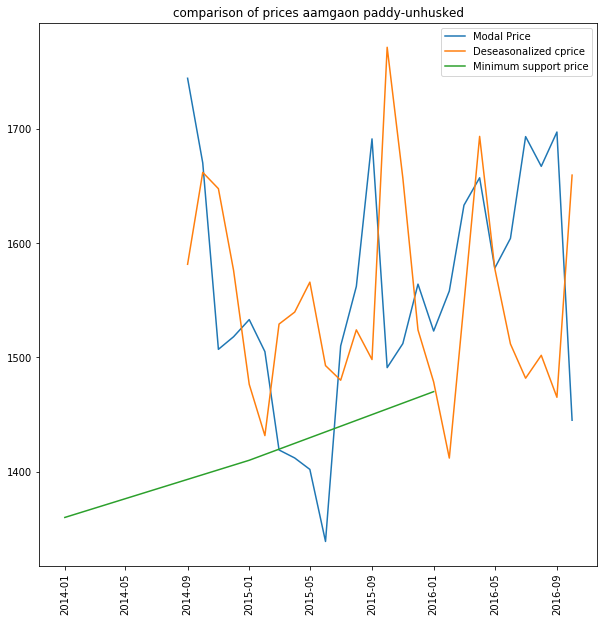

In [37]:
plot_comparison('aamgaon', 'paddy-unhusked')

In [38]:
os.mkdir('comparisons')
apmcs = df['APMC'].unique().tolist()
comms = df_msp['commodity'].unique().tolist()
for i in apmcs:
    for j in comms:
        plot_comparison(i, j, save = True)